In [2]:
from torchvision import datasets, transforms
import random
import numpy as np
import torch
from torch.nn.functional import cosine_similarity as cs
import copy
import matplotlib.pyplot as plt

In [126]:
res1 = torch.load('checkpoints/CIFAR10_ResNet18_IID_lfa_defender_0.1.t7')
res3 = torch.load('checkpoints/CIFAR10_ResNet18_IID_lfa_defender_0.3.t7')

magnitudes1 = res1['magnitude_history']
magnitudes1 = np.array(magnitudes1)
relevant1 = magnitudes1[:, [3, 5]]
non_relevant1 = magnitudes1[:, [0, 1, 2, 4, 6, 7, 8, 9]]
relevant1 = np.mean(relevant1, axis = 1)
non_relevant1 = np.mean(non_relevant1, axis = 1)


magnitudes3 = res3['magnitude_history']
magnitudes3 = np.array(magnitudes3)
relevant3 = magnitudes3[:, [3, 5]]
non_relevant3 = magnitudes3[:, [0, 1, 2, 4, 6, 7, 8, 9]]
relevant3 = np.mean(relevant3, axis = 1)
non_relevant3 = np.mean(non_relevant3, axis = 1)

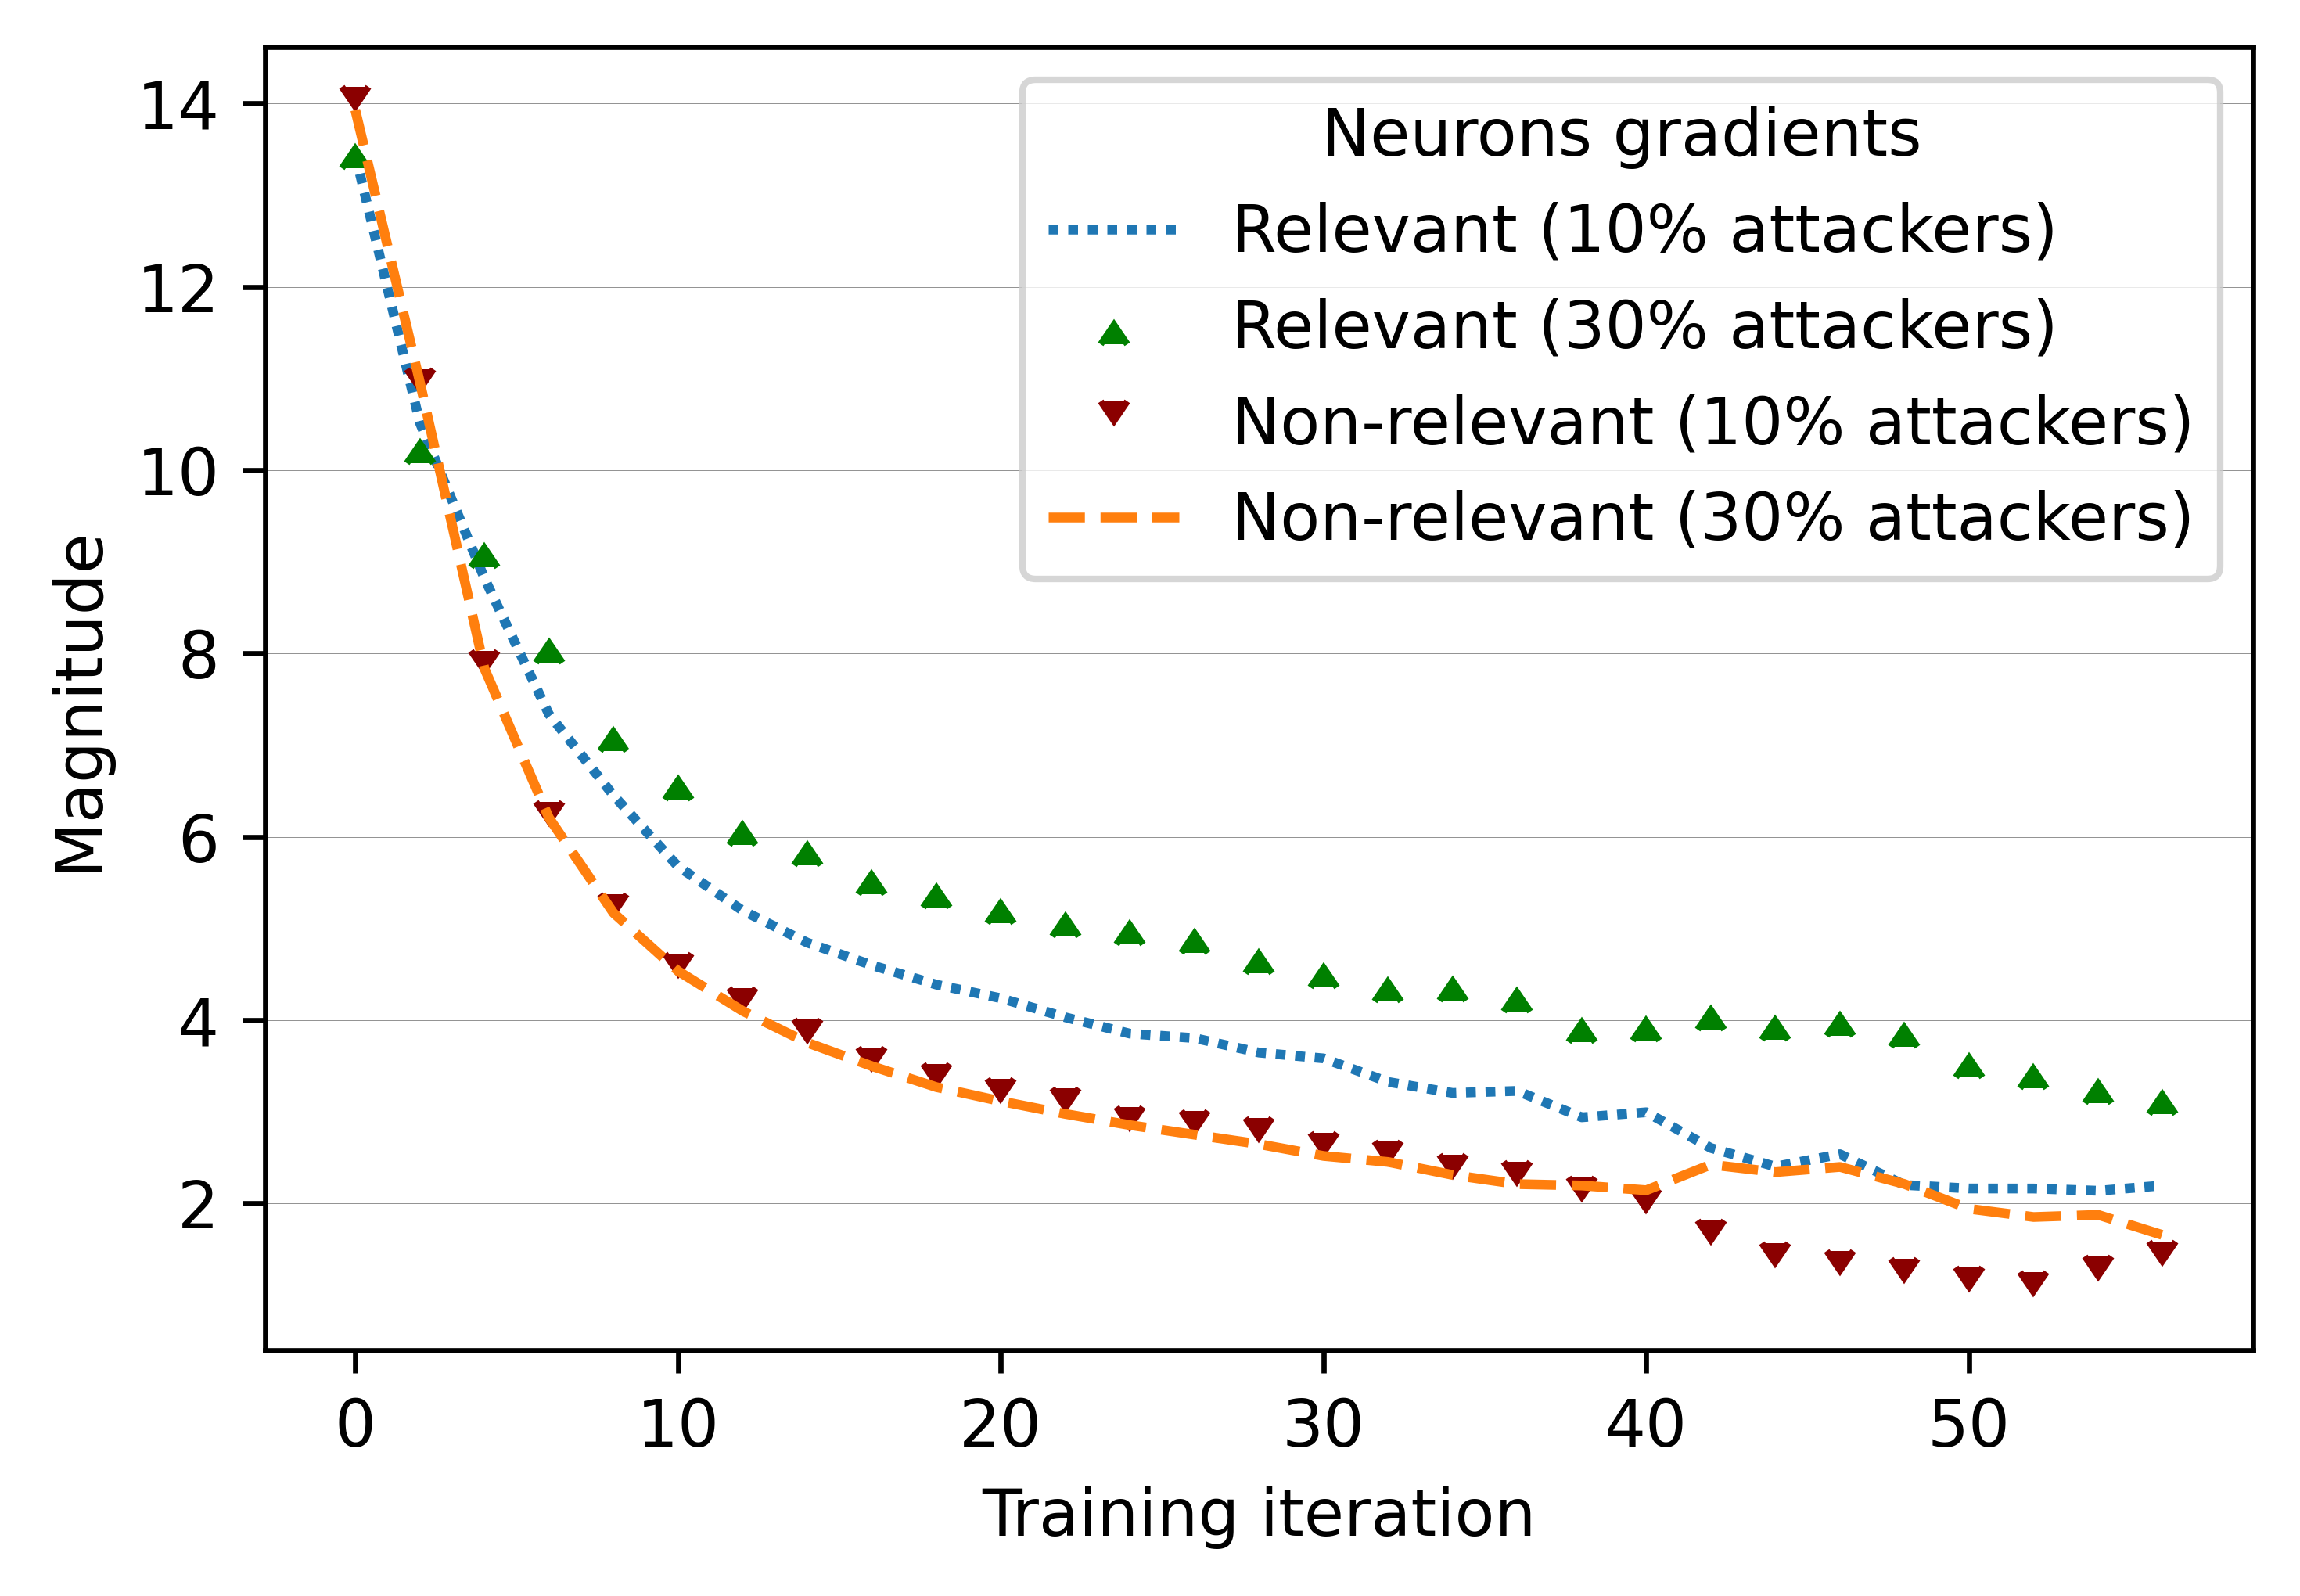

In [128]:
x = np.arange(0, len(relevant3), 2)


fig, ax = plt.subplots(figsize=(5, 3.5), dpi= 600, facecolor='w', edgecolor='k')
 

ax.plot(x, relevant1[x], label='Relevant (10% attackers)', linestyle = (0, (1, 1)))
ax.plot(x, relevant3[x], label='Relevant (30% attackers)', linestyle = ' ', color = 'g', marker = 6, markersize = 4)

ax.plot(x, non_relevant1[x], label='Non-relevant (10% attackers)',  
        color = 'darkred', linestyle = '', marker = 7, markersize = 4)
ax.plot(x, non_relevant3[x], label='Non-relevant (30% attackers)', linestyle = '--')




plt.xlabel("Training iteration")
plt.ylabel("Magnitude")
legend = ax.legend(title = 'Neurons gradients', loc = 'best')


plt.grid(color='gray', linestyle='-', linewidth=0.1, axis = 'y')
plt.tight_layout()
# plt.savefig('figures/magnitude_mnist_iid.pdf', dpi = 600)
plt.show()

In [ ]:
relevant

In [ ]:
global_model = torch.nn.utils.parameters_to_vector(gmodel.parameters())
local_grads = [(global_model-torch.nn.utils.parameters_to_vector(model.parameters()))/0.1 for model in models]

In [ ]:
for i, pt in enumerate(ptypes):
    print(i, pt, torch.norm(local_grads[i]))

In [ ]:
good_updates = [local_grads[i] for i in range(m) if ptypes[i] == 'honest']
bad_updates = [local_grads[i] for i in range(m) if ptypes[i] != 'honest']

In [ ]:
good = 1/10*good_updates[0]
bad = 1/10*bad_updates[0]
for i in range(1, 10):
    good+=1/10*good_updates[i]
    if i < 10:
        bad+=1/10*bad_updates[i]

In [ ]:
print('L1-norm of the whole good', torch.norm(good))
print('L1-norm of the whole bad',torch.norm(bad))
cos = cs(good.view(1, -1), bad.view(1, -1))
print('Angle between them', torch.arccos(cos)*180/torch.pi)

In [ ]:
dw = [None for i in range(m)]
gmodel = list(gmodel.parameters())
for i in range(m):
    dw[i]= (gmodel[-2] - list(models[i].parameters())[-2])/0.1 

In [ ]:
dw_good = None
dw_bad = None
for i, pt in enumerate(ptypes):
    if pt == 'honest':
        if dw_good == None:
            dw_good = 1/10*dw[i]
        else:
            dw_good+= 1/10*dw[i]
    else:
        if dw_bad == None:
            dw_bad = 1/10*dw[i]
        else:
            dw_bad+= 1/10*dw[i]
            

In [ ]:
print('L1-norm of the output layer good', torch.norm(dw_good))
print('L1-norm of the output layer bad',torch.norm(dw_bad))
cos = cs(dw_good.view(1, -1), dw_bad.view(1, -1))
print('Angle between them', torch.arccos(cos)*180/torch.pi)

In [ ]:
others = [i for i in range(10) if i not in [3, 5]]

In [ ]:
print('L1-norm of the output layer good', torch.norm(dw_good[:, others]))
print('L1-norm of the output layer bad',torch.norm(dw_bad[:, others]))
cos = cs(dw_good[:, others].view(1, -1), dw_bad[:, others].view(1, -1))
print('Angle between them', torch.arccos(cos)*180/torch.pi)

In [ ]:
print('L1-norm of the st  good', torch.norm(dw_good[:, [3, 5]]))
print('L1-norm of the st bad',torch.norm(dw_bad[:, [3, 5]]))
cos = cs(dw_good[:, [3, 5]].view(1, -1), dw_bad[:, [3, 5]].view(1, -1))
print('Angle between them', torch.arccos(cos)*180/torch.pi)

In [ ]:
x = [np.array([1, 2, 3]) for i in range(4)]
np.mean(x, axis=0)
dgrdggs\

In [ ]:
(0.031244516372680664 + 0.04687070846557617)/2

In [ ]:
scores = np.array([0.53211616, 0.56478572, 0.48823541, 0.58260704, 0.82675614, 0.74794901,
 0.35043377, 0.49136243, 0.39601702, 0.78267503, 0.77095027, 0.64397467,
 0.62886407, 0.68781707, 0.55804507, 0.54608419, 0.53693083, 0.61586372,
 0.53416664, 0.49403592])
scores = 1/(scores*scores)
scores = np.exp(scores)/(sum(np.exp(scores)))
scores

In [ ]:
labels = set()
labels.add(1)
labels.add(2)
labels

In [ ]:
def sample_dirichlet_train_data(dataset, num_users, alpha=0.7):
    classes = {}
    for idx, x in enumerate(dataset):
        _, label = x
        if label in classes:
            classes[label].append(idx)
        else:
            classes[label] = [idx]
    num_classes = len(classes.keys())
    class_size = len(classes[0])
   
    dict_users = {i: np.array([]) for i in range(num_users)}

    for n in range(num_classes):
        random.shuffle(classes[n])
        sampled_probabilities = class_size * np.random.dirichlet(np.array(num_users * [alpha]))
        for user in range(num_users):
            num_imgs = int(round(sampled_probabilities[user]))
            sampled_list = classes[n][:min(len(classes[n]), num_imgs)]
            dict_users[user] = np.concatenate((dict_users[user], np.array(sampled_list)), axis=0)
            classes[n] = classes[n][min(len(classes[n]), num_imgs):]
    # shuffle data
    for user in range(num_users):
        random.shuffle(dict_users[user])
    return dict_users

In [ ]:
print('==> Preparing CIFAR data..')
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])
dataset_train = datasets.CIFAR10('data/cifar', train=True, transform=transform_train, download=True)
dataset_test = datasets.CIFAR10('data/cifar', train=False, transform=transform_test, download=True)

dict_users = sample_dirichlet_train_data(dataset_train, 20)

In [ ]:
ex_dis = []
n = 0
for i in range(20):
    print('User {} Examples {}'.format(i+1, len(dict_users[i])))
    ex_dis.append(len(dict_users[i]))
    n+= len(dict_users[i])

In [ ]:
np.max(ex_dis)
n

In [ ]:
x = np.array([1, 0])
y = np.array([0, 1])
np.hstack((x, y))

In [ ]:
def solution(A):
    n = len(A)
    a, b = A[0], A[1]
    start, end = 0, 1
    m = end - start + 1
    min_avg = (a + b)/m
    
    for i in range(end+1, n):
        if (min_avg*m + A[i])/(m+1) < min_avg:
            end = i
            m+= 1
            min_avg = (min_avg*m + A[i])/m
        elif (A[end] + A[i])/2 < min_avg:
            min_avg = (A[end] + A[i])/2
            start = end
            end = i
    return start

In [ ]:
num_users, n_class, num_samples = 100, 2, 291
num_classes = 10

In [ ]:
data_dir = 'data/mnist/'
apply_transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.1307,), (0.3081,))])
train_dataset = datasets.MNIST(data_dir, train=True, download=True,
                                   transform=apply_transform)

test_dataset = datasets.MNIST(data_dir, train=False, download=True,
                                      transform=apply_transform)
n = len(train_dataset)

In [ ]:
dict_users_train = {i: np.array([]) for i in range(num_users)}
idxs = np.arange(n)
labels = np.array(train_dataset.targets)

In [ ]:
idxs_labels = np.vstack((idxs, labels))
idxs_labels = idxs_labels[:, idxs_labels[1, :].argsort()]
idxs = idxs_labels[0, :]
labels = idxs_labels[1, :]

In [ ]:
label_indices = {l:[] for l in range(num_classes)}
for l in label_indices:
    label_idxs = np.where(labels == l)
    label_indices[l] = list(idxs[label_idxs])

In [ ]:
labels = [i for i in range(num_classes)]

In [ ]:
for i in range(num_users):
    user_labels = np.random.choice(labels, n_class, replace=False)
    for l in  user_labels:
        print(labels)
        lab_idxs = label_indices[l][:num_samples]
        label_indices[l] = list(set(label_indices[l])-set(lab_idxs))
        if len(label_indices[l]) < num_samples:
            labels = list(set(labels)-set([l]))
        dict_users_train[i] = np.concatenate(
        (dict_users_train[i], lab_idxs), axis=0)

In [ ]:
len(dict_users_train[99])